## CAPSTONE PROJECT - CREDIT CARD FRAUD DETECTION------------By SadviSandhya

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

#supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve,roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix,average_precision_score

#undersampling
from imblearn.under_sampling import RandomUnderSampler

#oversampling
from imblearn.over_sampling import SMOTE,ADASYN

from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0,9.0)
import tensorflow as tf
from keras import models, layers, optimizers, initializers, metrics, losses
from sklearn import preprocessing
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import (precision_recall_curve, auc,roc_curve,precision_recall_fscore_support)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To read the file and check few data
cred_df = pd.read_csv('creditcard.csv')
#cred_df.head()

In [3]:
%%time
## Check data#fraud transction details#Normal transaction details

print('data is a %s' % type(cred_df))
print('data has %d rows and %d columns' % cred_df.shape)
print('Basic Statistics about data%s' % ('_'*50))
print(cred_df.describe())
print('')
print('Sample of data%s' % ('_'*50))
print(cred_df.head())

print('fraud transction details %s' % cred_df.Amount[cred_df.Class == 1].describe())

print('Normal transaction details %s' % cred_df.Amount[cred_df.Class == 0].describe())
print('Fraud and Non-fraud transaction counts %s' % ('_'*50))   
print(cred_df.Class.value_counts())     

data is a <class 'pandas.core.frame.DataFrame'>
data has 284807 rows and 31 columns
Basic Statistics about data__________________________________________________
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.8

In [4]:
# using standard scalar to scale Time and amount features
sc = StandardScaler()

cred_df[['Time', 'Amount']] = sc.fit_transform(cred_df[['Time', 'Amount']])

In [5]:
X = cred_df.drop('Class', axis=1)
y = cred_df.Class
X.shape, y.shape

((284807, 30), (284807,))

#### Splitting the data Train set 70% , Test set 30%

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
y_test_df = pd.DataFrame(y_test)

In [9]:
y_test_df.Class.value_counts()

0    85307
1      136
Name: Class, dtype: int64

## Undersampling

Since the dataset is extremely unbalanced (492 frudes and 284315 normal data points), 
we need to undersample the normal data points.

In [10]:
print("Class 1, Before using RandomUnderSampler: {} ".format(sum(y_train==1)))
print("Class 0, Before using RandomUnderSampler: {} ".format(sum(y_train==0)))

Class 1, Before using RandomUnderSampler: 356 
Class 0, Before using RandomUnderSampler: 199008 


In [11]:
rus = RandomUnderSampler(random_state=27)
X_train_rus,y_train_rus= rus.fit_resample(X_train,y_train)
X_train_rus.shape,y_train_rus.shape

((712, 30), (712,))

In [12]:
print("Label 1, After using RandomUnderSampler: {}".format(sum(y_train_rus==1)))
print("Label 0, After using RandomUnderSampler: {}".format(sum(y_train_rus==0)))

Label 1, After using RandomUnderSampler: 356
Label 0, After using RandomUnderSampler: 356


## Oversampling by SMOTE

In [13]:
%%time
print("Shape of the X_train before applying SMOTE is: ", X_train.shape)
print("Shape of the y_train data before applying SMOTE is: ", y_train.shape)
print("Shape of the X_test before applying SMOTE is: ", X_test.shape)
print("Shape of the y_test before applying SMOTE is: ", y_test.shape)
print()
print("Before applying SMOTE the count of the fraud cases are: ", y_train.value_counts().values[1])
print("Before applying SMOTE the count of the non-fraud cases are: ", y_train.value_counts().values[0])

smt = SMOTE(random_state = 2)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

print("Shape of the X_train after applying SMOTE is: ", X_train_sm.shape)
print("Shape of the y_train data after applying SMOTE is: ", y_train_sm.shape)
print()
print("After applying SMOTE the count of the fraud cases are: ", sum(y_train_sm == 1))
print("After applying SMOTE the count of the non-fraud cases are: ", sum(y_train_sm == 0))
print("After applying SMOTE the percentage of the fraud cases are: ", sum(y_train_sm == 1)/ len(y_train_sm) * 100.0)
print("After applying SMOTE the percentage of the non-fraud cases are: ", sum(y_train_sm == 0)/ len(y_train_sm) * 100.0)

Shape of the X_train before applying SMOTE is:  (199364, 30)
Shape of the y_train data before applying SMOTE is:  (199364,)
Shape of the X_test before applying SMOTE is:  (85443, 30)
Shape of the y_test before applying SMOTE is:  (85443,)

Before applying SMOTE the count of the fraud cases are:  356
Before applying SMOTE the count of the non-fraud cases are:  199008
Shape of the X_train after applying SMOTE is:  (398016, 30)
Shape of the y_train data after applying SMOTE is:  (398016,)

After applying SMOTE the count of the fraud cases are:  199008
After applying SMOTE the count of the non-fraud cases are:  199008
After applying SMOTE the percentage of the fraud cases are:  50.0
After applying SMOTE the percentage of the non-fraud cases are:  50.0
Wall time: 503 ms


## Oversampling by ADASYN

In [14]:
%%time
print("Shape of the X_train before applying ADASYN is: ", X_train.shape)
print("Shape of the y_train data before applying ADASYN is: ", y_train.shape)
print("Shape of the X_test before applying ADASYN is: ", X_test.shape)
print("Shape of the y_test before applying ADASYN is: ", y_test.shape)
print()
print("Before applying ADASYN the count of the fraud cases are: ", y_train.value_counts().values[1])
print("Before applying ADASYN the count of the non-fraud cases are: ", y_train.value_counts().values[0])

adasyn = ADASYN(random_state=2)
X_train_ad, y_train_ad = adasyn.fit_resample(X_train, y_train)

print("Shape of the X_train after applying ADASYN is: ", X_train_ad.shape)
print("Shape of the y_train data after applying ADASYN is: ", y_train_ad.shape)
print()
print("After applying ADASYN the count of the fraud cases are: ", sum(y_train_ad == 1))
print("After applying ADASYN the count of the non-fraud cases are: ", sum(y_train_ad == 0))

Shape of the X_train before applying ADASYN is:  (199364, 30)
Shape of the y_train data before applying ADASYN is:  (199364,)
Shape of the X_test before applying ADASYN is:  (85443, 30)
Shape of the y_test before applying ADASYN is:  (85443,)

Before applying ADASYN the count of the fraud cases are:  356
Before applying ADASYN the count of the non-fraud cases are:  199008
Shape of the X_train after applying ADASYN is:  (398024, 30)
Shape of the y_train data after applying ADASYN is:  (398024,)

After applying ADASYN the count of the fraud cases are:  199016
After applying ADASYN the count of the non-fraud cases are:  199008
Wall time: 1.74 s


In [15]:
#General Function to display Confusion matrix, ROC Curve, Precision Recall Curve

In [16]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    print(classification_report(actual, prediction))
    return (accuracy_, precision_, recall_, roc_auc_)

### Logistic Regression

In [17]:
%%time
#Base model
lgr = LogisticRegression(max_iter=10000)
lgr.fit(X_train, y_train)
score_lgr = lgr.score(X_train, y_train)
score_lgrtest = lgr.score(X_test, y_test)
predictions_lgr = lgr.predict(X_test)
print(score_lgrtest)
#print(classification_report(y_test,y_pred_lgr))
#print(metrics.confusion_matrix(y_test,y_pred_lgr))

0.9992743700478681
Wall time: 1.35 s


In [18]:
%%time
#Logistic Reg With SMOTE
lgr_smote = LogisticRegression(max_iter=10000)
lgr_smote.fit(X_train_sm, y_train_sm)
predictions_lgr_smote = lgr_smote.predict(X_test)

Wall time: 2.75 s


In [19]:
%%time
#Logistic Reg With ADASYN
lgr_adasyn = LogisticRegression(max_iter=10000)
lgr_adasyn.fit(X_train_ad, y_train_ad)
predictions_lgr_adasyn = lgr_adasyn.predict(X_test)

Wall time: 2.74 s


In [20]:
%%time
#Logistic Reg Under sampling
lgr_rus = LogisticRegression(max_iter=10000)
lgr_rus.fit(X_train_rus,y_train_rus)
predictions_lgr_rus = lgr_rus.predict(X_test)

Wall time: 27.9 ms


Accuracy : 0.9993 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8776 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6324 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8161                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


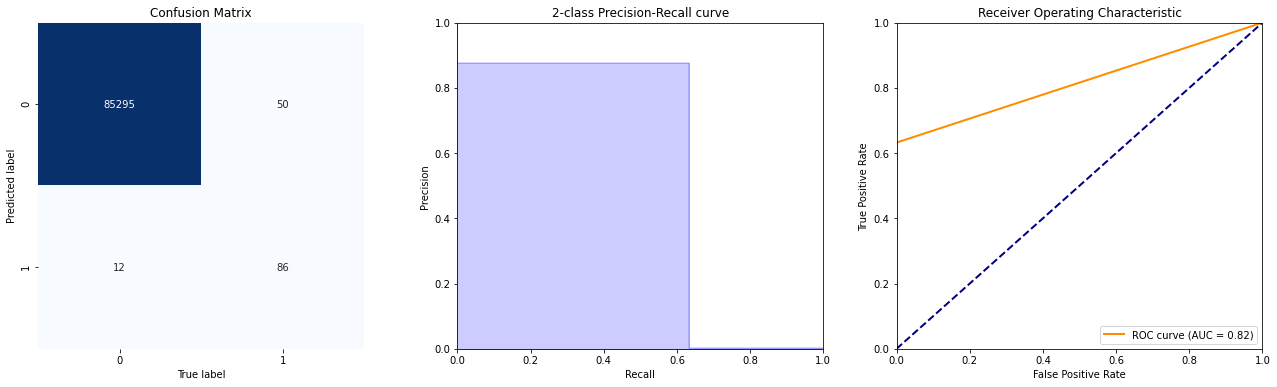

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



(0.9992743700478681,
 0.8775510204081632,
 0.6323529411764706,
 0.8161061363835393)

In [21]:
# Classification report and summary report logistic regression
show_summary_report(y_test, predictions_lgr)


Accuracy : 0.9732 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0527 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9338 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9535                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


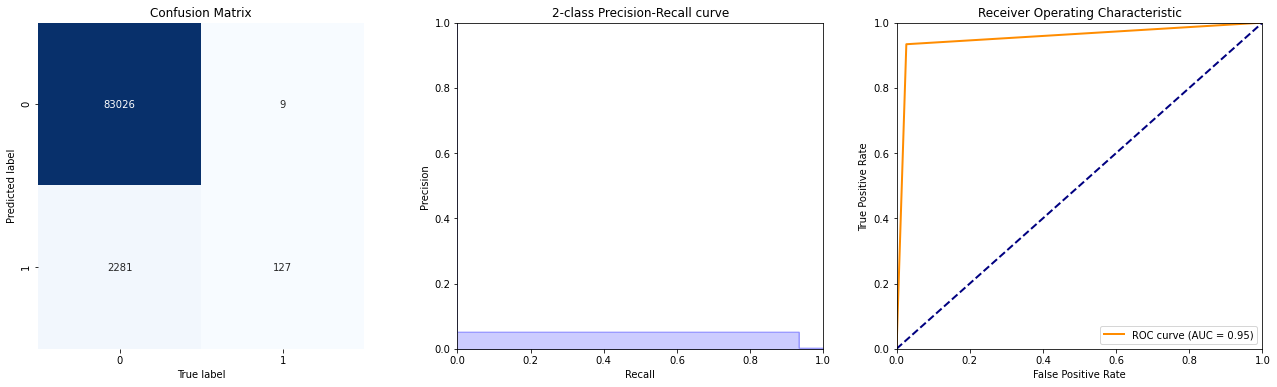

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



(0.9731985066067437,
 0.052740863787375414,
 0.9338235294117647,
 0.9535424046299215)

In [22]:
# Classification report and summary report logistic regression with smote
show_summary_report(y_test, predictions_lgr_smote)

Accuracy : 0.9058 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0159 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9559 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9308                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


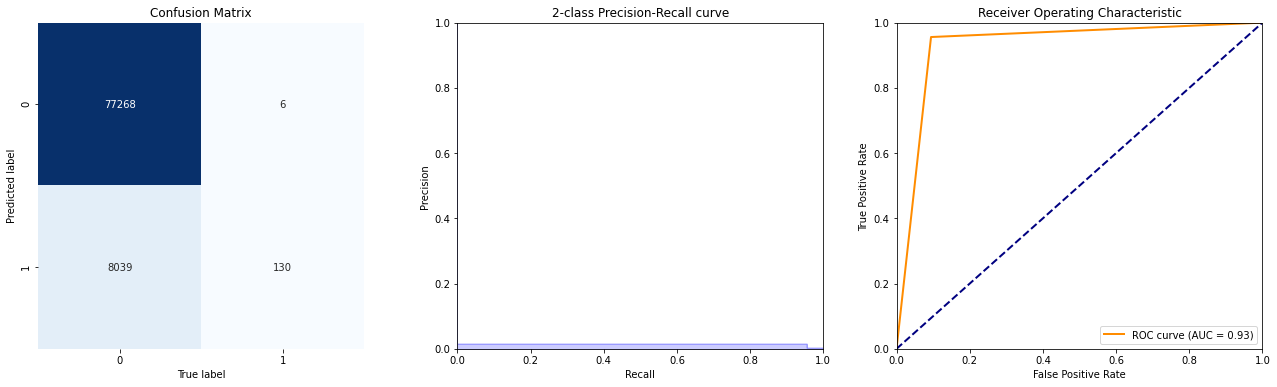

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85307
           1       0.02      0.96      0.03       136

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443



(0.9058436618564423,
 0.0159138205410699,
 0.9558823529411765,
 0.9308231205080061)

In [23]:
# Classification report and summary report logistic regression with adasyn
show_summary_report(y_test, predictions_lgr_adasyn)

Accuracy : 0.9577 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0340 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9338 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9458                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


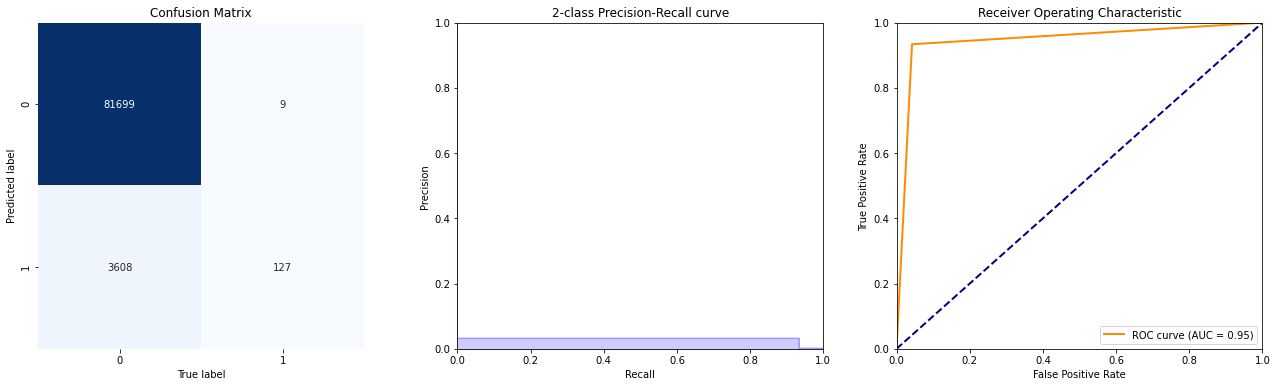

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.03      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.52     85443
weighted avg       1.00      0.96      0.98     85443



(0.9576676848893414,
 0.03400267737617135,
 0.9338235294117647,
 0.9457646138272909)

In [24]:
# Classification report and summary report logistic regression with under sampling
show_summary_report(y_test, predictions_lgr_rus)

### Decision Tree

In [25]:
#Base model Decision Tree
criterion = 'entropy'
splitter = 'random'
max_depth = 10
min_samples_split=10
min_samples_leaf=1
random_state= 1


In [26]:
%%time
dt= DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=random_state)
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)

Wall time: 416 ms


In [27]:
%%time
#Under sampling
dt_rus= DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=random_state)
dt_rus.fit(X_train_rus,y_train_rus)
predictions_dt_rus = dt_rus.predict(X_test)

Wall time: 19 ms


In [28]:
%%time
#Smote
dt_smote = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=random_state)

dt_smote.fit(X_train_sm, y_train_sm)

predictions_dt_smote= dt_smote.predict(X_test)

Wall time: 992 ms


In [29]:
%%time
# ADASYN oversampling
dt_ada = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=random_state)

dt_ada.fit(X_train_ad, y_train_ad)

predictions_dt_ada= dt_ada.predict(X_test)

Wall time: 900 ms


Accuracy : 0.9994 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8522 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7206 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8602                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


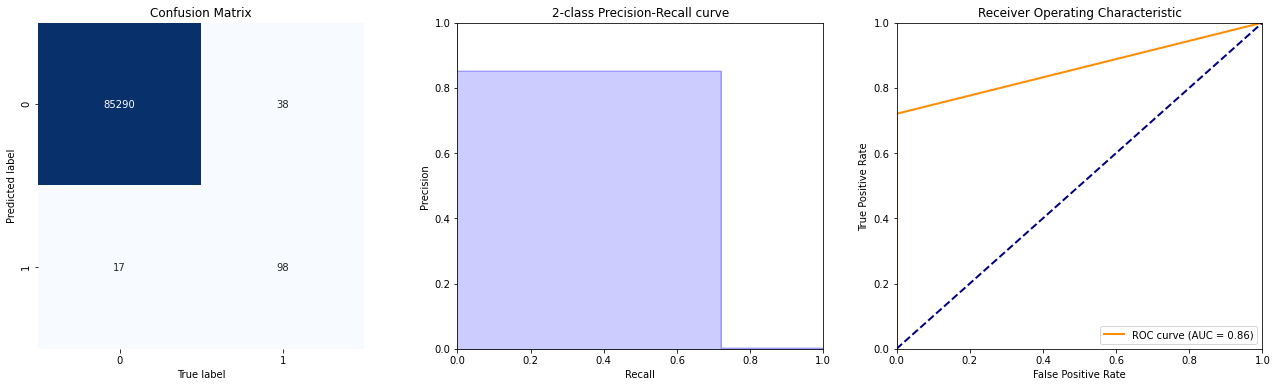

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.72      0.78       136

    accuracy                           1.00     85443
   macro avg       0.93      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443



(0.9993562960102056,
 0.8521739130434782,
 0.7205882352941176,
 0.8601944775237396)

In [30]:
show_summary_report(y_test, predictions_dt)

Accuracy : 0.9125 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0166 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9265 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9195                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


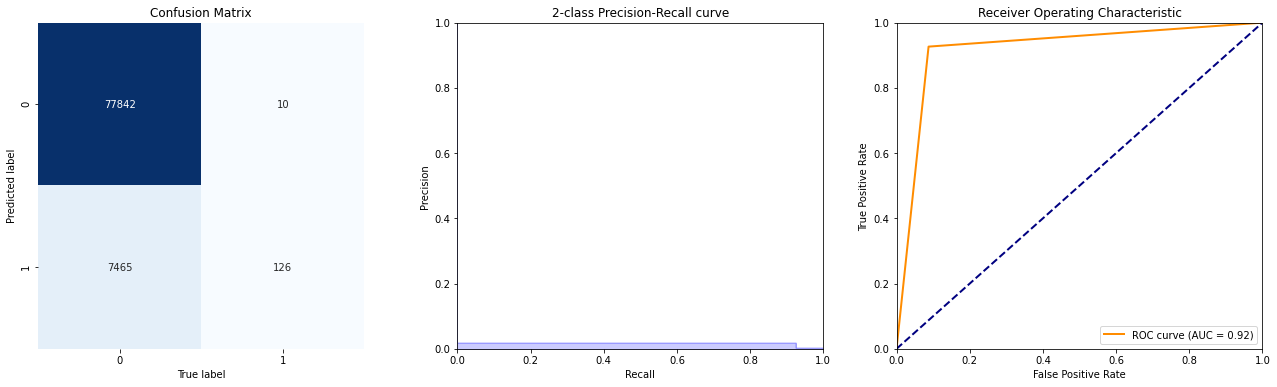

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85307
           1       0.02      0.93      0.03       136

    accuracy                           0.91     85443
   macro avg       0.51      0.92      0.49     85443
weighted avg       1.00      0.91      0.95     85443



(0.912514775932493,
 0.01659860360953761,
 0.9264705882352942,
 0.9194815576130225)

In [31]:
show_summary_report(y_test,predictions_dt_rus)

Accuracy : 0.9779 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0599 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8750 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9266                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


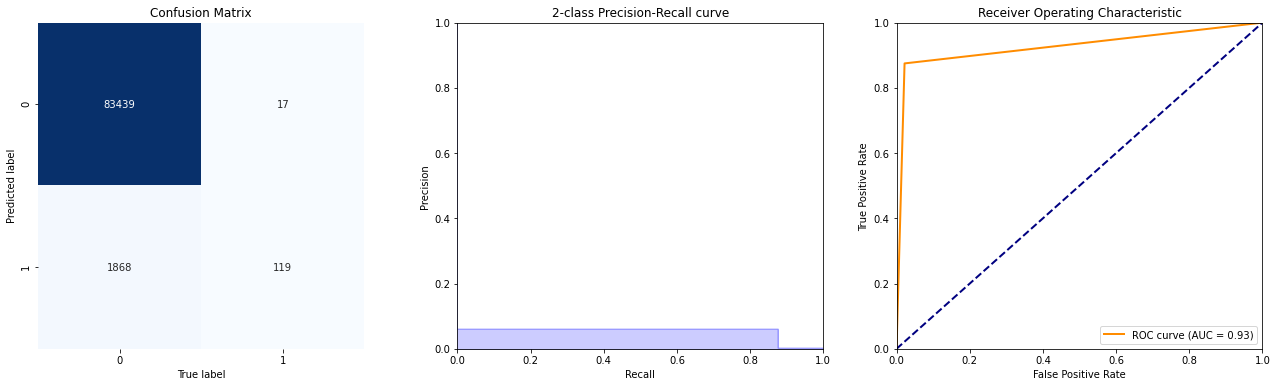

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.88      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



(0.9779385087134113, 0.05988928032209361, 0.875, 0.9265513088023257)

In [32]:
show_summary_report(y_test,predictions_dt_smote)

Accuracy : 0.9329 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0207 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8897 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9114                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


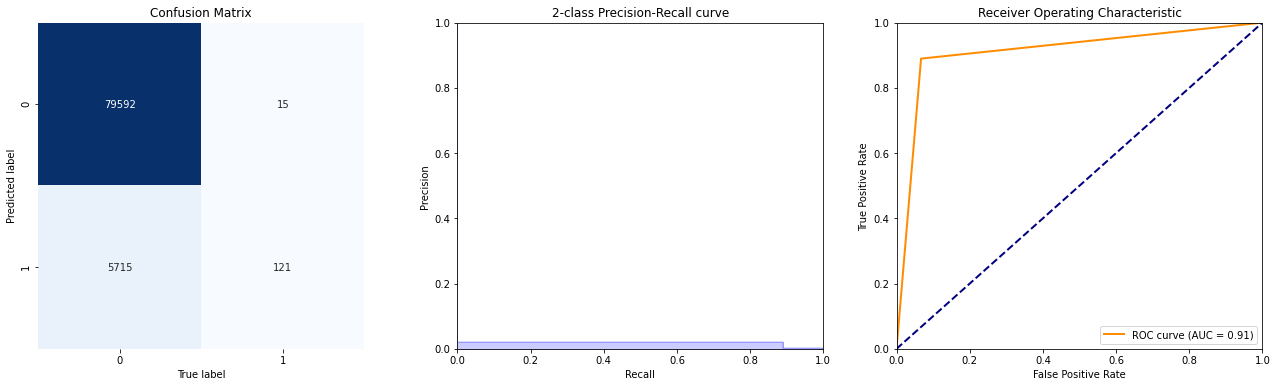

              precision    recall  f1-score   support

           0       1.00      0.93      0.97     85307
           1       0.02      0.89      0.04       136

    accuracy                           0.93     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.93      0.96     85443



(0.9329377479723324,
 0.020733379026730638,
 0.8897058823529411,
 0.9113562761900099)

In [33]:
show_summary_report(y_test,predictions_dt_ada)

### Random Forest

In [35]:
%%time
#Random forest Base
rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(X_train, y_train)

predictions_rfc= rfc.predict(X_test)

Wall time: 2min 27s


In [ ]:
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# # classifier.fit(X_train, y_train)
#rfc = RandomForestClassifier(n_estimators=400,n_jobs=-1,max_depth=6)

In [36]:
%%time
#Random forest Undersampling
rfc_rus = RandomForestClassifier(n_estimators = 100)

rfc_rus.fit(X_train_rus,y_train_rus)

predictions_rfc_rus= rfc_rus.predict(X_test)

Wall time: 782 ms


In [37]:
%%time
#Random forest Smote oversampling
rfc_smote = RandomForestClassifier(n_estimators = 100)

rfc_smote.fit(X_train_sm, y_train_sm)

predictions_rfc_smote= rfc_smote.predict(X_test)

Wall time: 3min 59s


In [38]:
%%time
#Random forest ADASYN oversampling
rfc_ada = RandomForestClassifier(n_estimators = 100)

rfc_ada.fit(X_train_ad, y_train_ad)

predictions_rfc_ada= rfc_ada.predict(X_test)

Wall time: 4min 58s


Accuracy : 0.9996 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9328 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8162 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9080                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


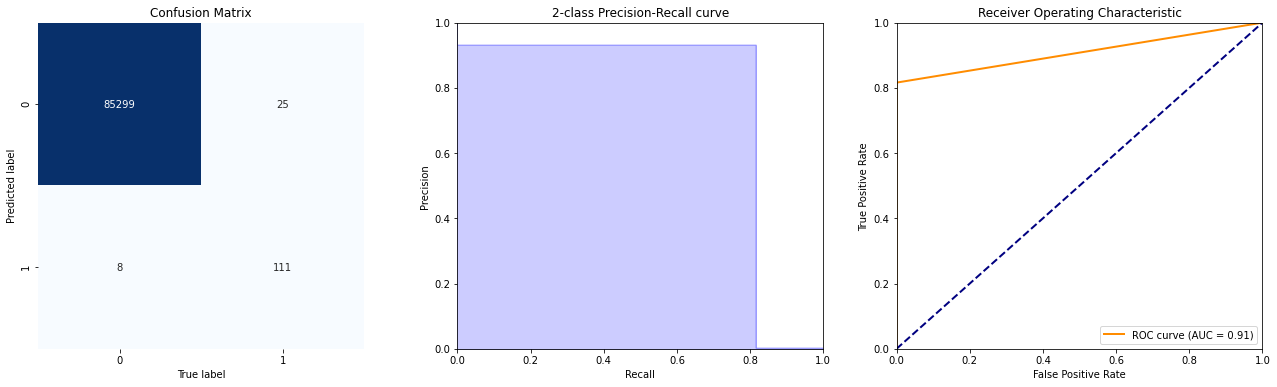

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



(0.9996137776061234,
 0.9327731092436975,
 0.8161764705882353,
 0.9080413458243203)

In [39]:
show_summary_report(y_test, predictions_rfc)

Accuracy : 0.9717 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0497 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9265 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9491                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


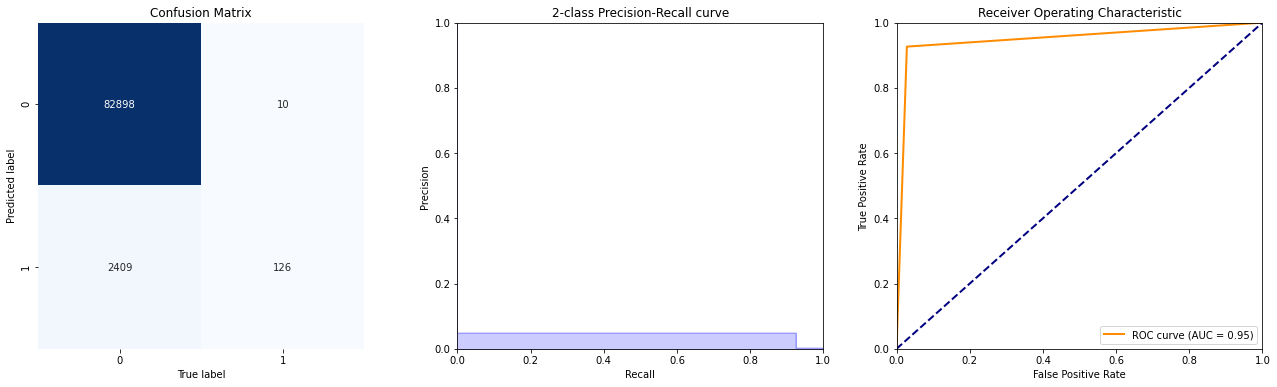

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



(0.9716887281579533,
 0.04970414201183432,
 0.9264705882352942,
 0.9491157025249289)

In [40]:
show_summary_report(y_test, predictions_rfc_rus)

Accuracy : 0.9996 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8500 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8750 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9374                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


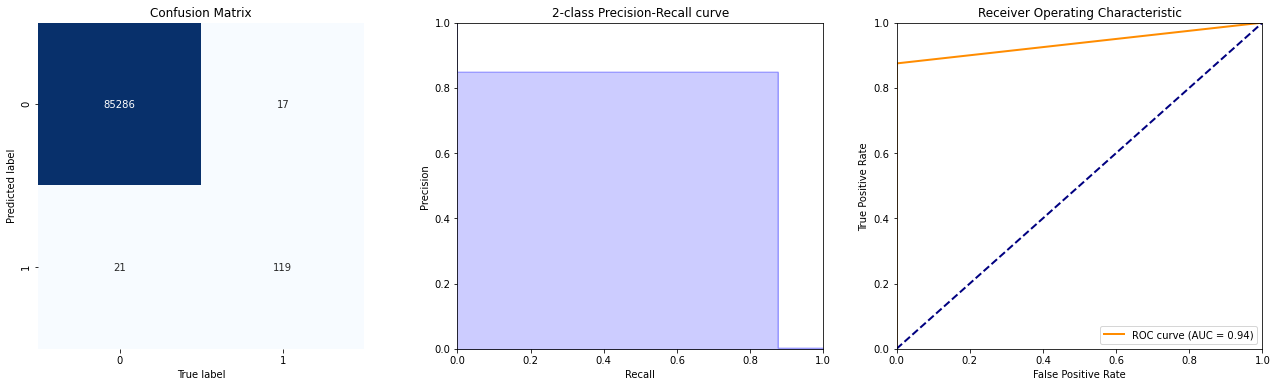

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.88      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



(0.9995552590615966, 0.85, 0.875, 0.9373769151417819)

In [41]:
show_summary_report(y_test, predictions_rfc_smote)

Accuracy : 0.9995 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8345 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8529 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9263                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


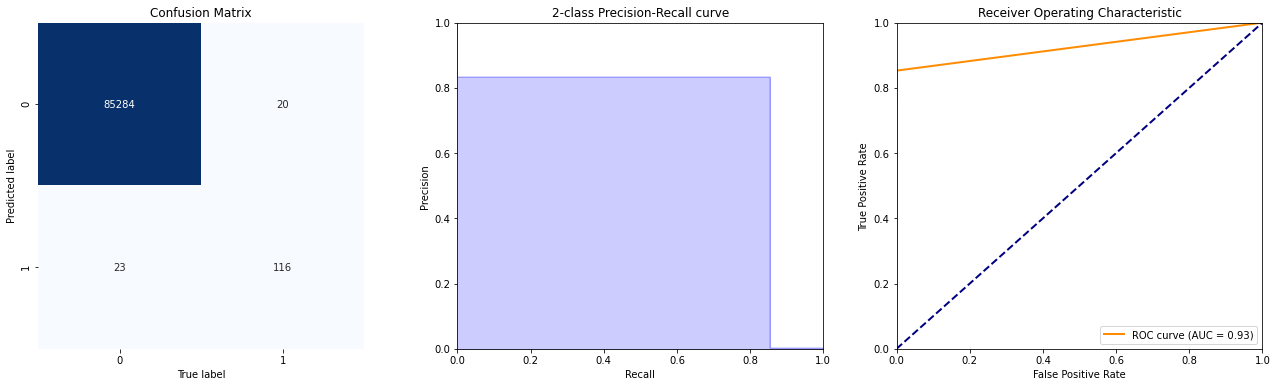

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.85      0.84       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



(0.9994967405170698,
 0.8345323741007195,
 0.8529411764705882,
 0.9263357810096269)

In [42]:
show_summary_report(y_test, predictions_rfc_ada)

In [43]:
# Grid serch to find best params for Random forest

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'n_estimators': [100, 200, 500],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
            }

rfc_gscv = GridSearchCV(estimator = rfc, param_grid = param_grid, scoring = 'f1', verbose = 10, n_jobs = -1)



In [45]:
# commented it as it takes long time to run, pasted the result below and used the best params from this to hyper tune the RF model,to check one can uncomment the below code and run
# rfc_gscv.fit(X_train, y_train)

# best_parameters = rfc_gscv.best_params_
# print("The best parameters for using this model is", best_parameters)


Fitting 5 folds for each of 54 candidates, totalling 270 fits The best parameters for using this model is {'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

### Hypertuning Random forest

In [46]:
%%time
rfc_bestp = RandomForestClassifier(n_estimators=100,
                                 max_features = 3, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                random_state = 1)

rfc_bestp.fit(X_train, y_train)

Wall time: 21.6 s


RandomForestClassifier(max_features=3, n_jobs=-1, random_state=1)

Accuracy : 0.9996 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9474 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7941 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8970                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


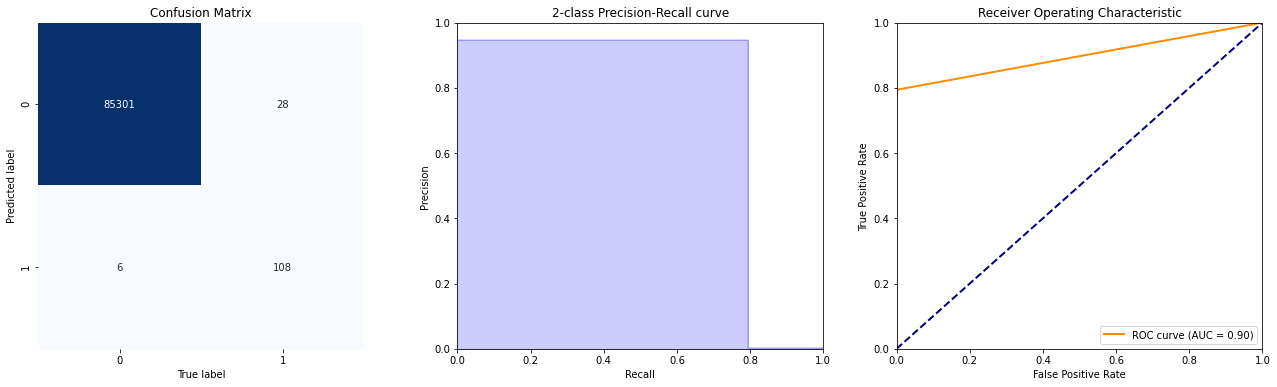

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.79      0.86       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Wall time: 744 ms


(0.999602073897218, 0.9473684210526315, 0.7941176470588235, 0.8970236564270637)

In [47]:
%%time
predictions_rfc_bestp= rfc_bestp.predict(X_test)
show_summary_report(y_test, predictions_rfc_bestp)

In [48]:
%%time
#rfc_smote = RandomForestClassifier(n_estimators = 100)
rfc_smote_bestp = RandomForestClassifier(n_estimators=140,
                                 max_features = 3, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                random_state = 1)


rfc_smote_bestp.fit(X_train_sm, y_train_sm)

predictions_rfc_smote_bestp= rfc_smote_bestp.predict(X_test)

Wall time: 50.5 s


Accuracy : 0.9996 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8571 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8824 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9411                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


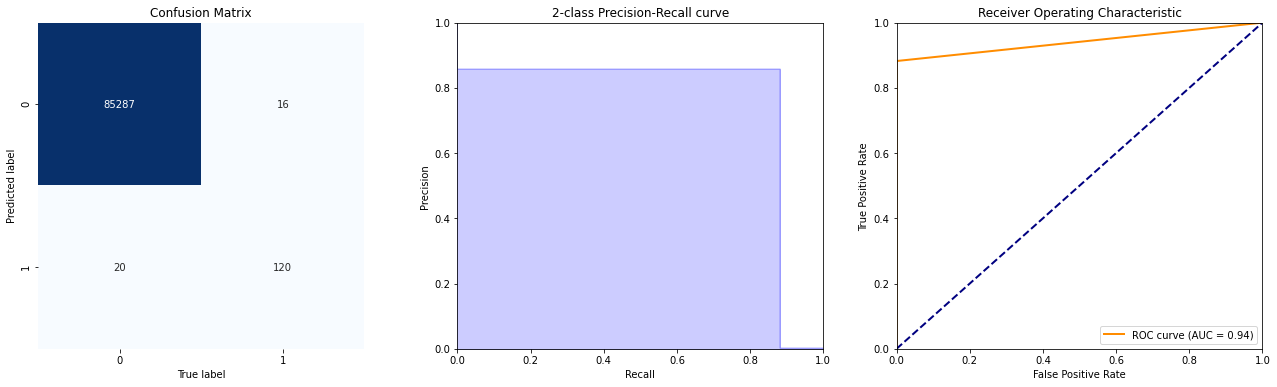

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.88      0.87       136

    accuracy                           1.00     85443
   macro avg       0.93      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



(0.9995786664794073,
 0.8571428571428571,
 0.8823529411764706,
 0.9410592469137421)

In [49]:
show_summary_report(y_test,predictions_rfc_smote_bestp)

### XG Boost

In [50]:
%%time
#XG Boost Base
xgbc = XGBClassifier(n_estimators = 1000)

xgbc.fit(X_train, y_train)

predictions_xgb = xgbc.predict(X_test)
predictions_prob_xgb = xgbc.predict_proba(X_test)

[14:16:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 38s


In [51]:
%%time
#XGB UnderSampling
xgbc_rus = XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580)

xgbc_rus.fit(X_train_rus,y_train_rus)

predictions_xgb_rus = xgbc_rus.predict(X_test)

[14:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 626 ms


In [52]:
%%time
#XGB forest Smote oversampling
xgbc_smote = XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580)

xgbc_smote.fit(X_train_sm, y_train_sm)

predictions_xgbc_smote= xgbc_smote.predict(X_test)

[14:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 4min 54s


In [53]:
%%time
#XGB forest ADASYN oversampling
xgbc_ada = XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580)

xgbc_ada.fit(X_train_ad, y_train_ad)

predictions_xgbc_ada= xgbc_ada.predict(X_test)

[14:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 5min 22s


Accuracy : 0.9997 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9496 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8309 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9154                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


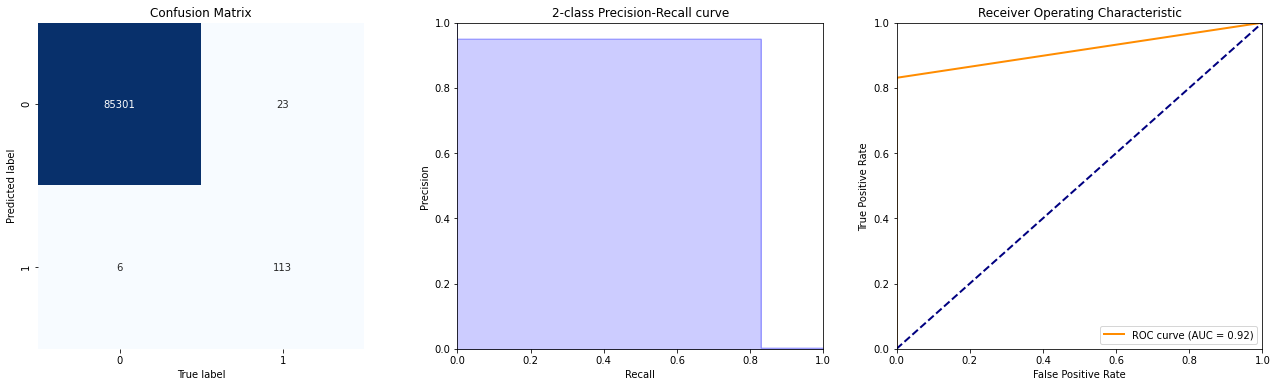

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.83      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



(0.9996605924417448,
 0.9495798319327731,
 0.8308823529411765,
 0.9154060093682403)

In [54]:
show_summary_report(y_test, predictions_xgb)

Accuracy : 0.8996 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0147 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9412 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9204                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


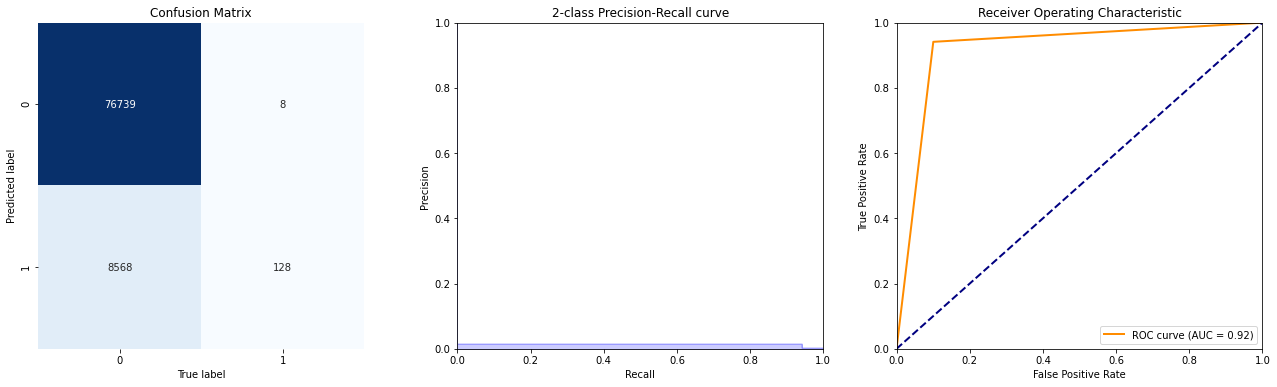

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.01      0.94      0.03       136

    accuracy                           0.90     85443
   macro avg       0.51      0.92      0.49     85443
weighted avg       1.00      0.90      0.95     85443



(0.8996289924277003,
 0.014719411223551058,
 0.9411764705882353,
 0.9203696131411876)

In [55]:
show_summary_report(y_test, predictions_xgb_rus)

Accuracy : 0.9991 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6541 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8897 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9445                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


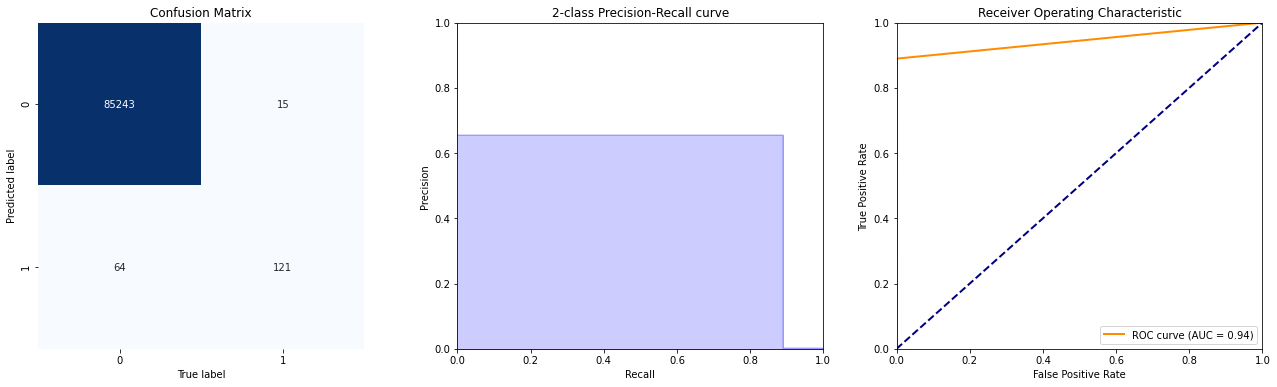

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.65      0.89      0.75       136

    accuracy                           1.00     85443
   macro avg       0.83      0.94      0.88     85443
weighted avg       1.00      1.00      1.00     85443



(0.9990754069964772, 0.654054054054054, 0.8897058823529411, 0.944477825418092)

In [56]:
show_summary_report(y_test,predictions_xgbc_smote)

Accuracy : 0.9990 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6378 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8676 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9334                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


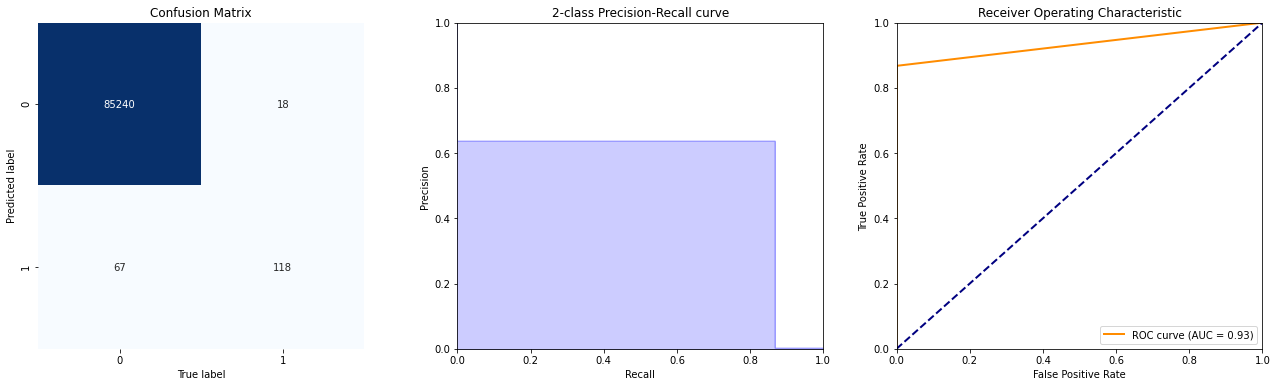

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.64      0.87      0.74       136

    accuracy                           1.00     85443
   macro avg       0.82      0.93      0.87     85443
weighted avg       1.00      1.00      1.00     85443



(0.9990051847430451,
 0.6378378378378379,
 0.8676470588235294,
 0.9334308301022123)

In [57]:
show_summary_report(y_test,predictions_xgbc_ada)

#### Hyper tuning XGB

In [58]:
%%time
#XG Boost Base
xgbc_bpm = XGBClassifier(n_estimators = 500,learning_rate =0.05, n_jobs=-1)

xgbc_bpm.fit(X_train, y_train)

predictions_xgbc_bpm = xgbc_bpm.predict(X_test)

[14:39:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2min 23s


Accuracy : 0.9997 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9652 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8162 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9081                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


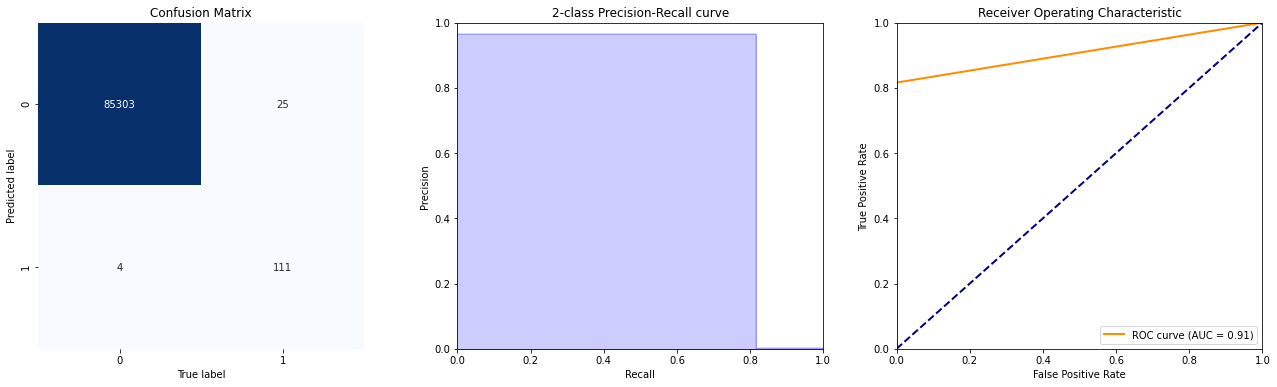

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.97      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



(0.9996605924417448, 0.9652173913043478, 0.8161764705882353, 0.908064790559219)

In [59]:
show_summary_report(y_test, predictions_xgbc_bpm)

## Stacking

In [60]:
# np.random.seed(0)
# clf1 = KNeighborsClassifier(n_neighbors = 3)
# clf2 = LogisticRegression(max_iter=10000)
# clf3 = GaussianNB()
# clf4 = DecisionTreeClassifier()

# rfc = RandomForestClassifier(n_estimators = 10, random_state = 1)

# sclf = StackingClassifier(classifiers = [clf1], meta_classifier = rfc)

In [61]:
%%time
np.random.seed(0)
clf1 = KNeighborsClassifier(n_neighbors = 1)
clf2 = RandomForestClassifier(n_estimators = 10, random_state = 1)
clf3 = GaussianNB()
lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs')
sclf = StackingClassifier(
    classifiers = [clf1, clf2, clf3],
    meta_classifier = lr)

Wall time: 995 µs


In [62]:
%%time
sclf.fit(X_train, y_train)
predictions_stack= sclf.predict(X_test)

Wall time: 9min 2s


In [63]:
%%time
#takes 1 hr 50 minutes
sclf.fit(X_train_sm, y_train_sm)
predictions_stack_smote = sclf.predict(X_test)

Wall time: 29min 40s


Accuracy : 0.9995 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8561 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8309 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9153                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


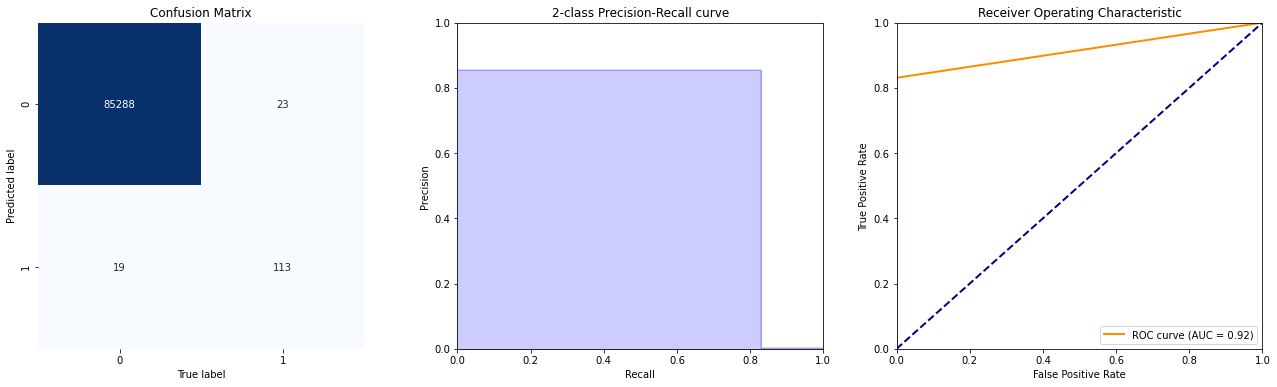

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.83      0.84       136

    accuracy                           1.00     85443
   macro avg       0.93      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



(0.9995084442259752,
 0.8560606060606061,
 0.8308823529411765,
 0.9153298139798196)

In [64]:
show_summary_report(y_test,predictions_stack)

Accuracy : 0.9995 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8082 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8676 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9337                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


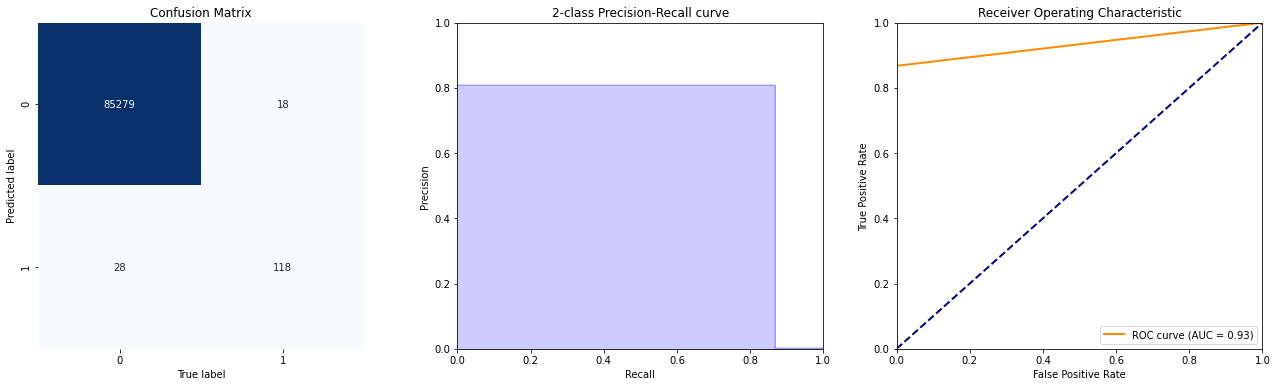

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.87      0.84       136

    accuracy                           1.00     85443
   macro avg       0.90      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



(0.9994616293903538,
 0.8082191780821918,
 0.8676470588235294,
 0.9336594162674741)

In [65]:
show_summary_report(y_test,predictions_stack_smote)

### unsupervised learning

In [66]:
cred_df1 = pd.read_csv('creditcard.csv')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
# scaling the dataset
min_max_scaler = preprocessing.MinMaxScaler()
cred_df1=cred_df1.drop("Time",axis=1)
df_cred_scaled = min_max_scaler.fit_transform(cred_df1.iloc[:,:-1])
cred_df_scaled = pd.DataFrame(df_cred_scaled)

In [68]:
cred_df_scaled["Class"]=cred_df["Class"]
cred_df_scaled["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Spliting Data

Splitting the data into train set , test set and validation set

20% percent in test set of 0 class then 10% in validation set of class 0 as we know in training label 1 class will not go but to decide the threshold of mse so that we can classify anomaly perfectly so 50% of the 1 class percent we will be in test set rest 50% in validate set (class 0 will be there too with class 1 in both sets validation and test)

In [69]:
cred_df_scaled_train=cred_df_scaled[cred_df_scaled["Class"]==0]
cred_df_scaled_test=cred_df_scaled[cred_df_scaled["Class"]==1]

In [70]:
cred_df_scaled_test_part_1=cred_df_scaled_train.sample(frac=0.05)
cred_df_scaled_train=cred_df_scaled_train.drop(cred_df_scaled_test_part_1.index)
cred_df_scaled_test_part_2=cred_df_scaled_train.sample(frac=0.05)
cred_df_scaled_train=cred_df_scaled_train.drop(cred_df_scaled_test_part_2.index)

In [71]:
cred_df_scaled_test_part_1.shape,cred_df_scaled_test_part_2.shape

((14216, 30), (13505, 30))

In [72]:
cred_df_scaled_train.shape

(256594, 30)

In [73]:
cred_df_scaled_test_class_1=cred_df_scaled_test.sample(frac=0.5)
cred_df_scaled_validation_class_1=cred_df_scaled_test.drop(cred_df_scaled_test_class_1.index)
cred_df_scaled_test_class_1.shape

(246, 30)

Merging of test and validation sets

In [75]:
cred_df_scaled_test_set=cred_df_scaled_test_part_1.append(cred_df_scaled_test_class_1)
cred_df_scaled_validation_set=cred_df_scaled_test_part_2.append(cred_df_scaled_validation_class_1)
print("train set dimensions :",cred_df_scaled_train.shape)
print("test set dimensions :",cred_df_scaled_test_set.shape)
print("validate set dimensions :",cred_df_scaled_validation_set.shape)
cred_df_scaled_validation_set["Class"].value_counts()

train set dimensions : (256594, 30)
test set dimensions : (14462, 30)
validate set dimensions : (13751, 30)


0    13505
1      246
Name: Class, dtype: int64

In [76]:
#we need some small part of training set in testing of autoencoder network for reconstruction of values
X_train, X_test = train_test_split(cred_df_scaled_train, test_size=0.2, random_state=2020)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(205275, 29)

### Autoencoder

In [77]:
#Activation function used sigmoid (logistic activation function(0,1))
# Input layer with a shape of features/columns of the dataset
# Construct encoder network,# Decoder network
# getting autoencoder

In [78]:
input_dim = X_train.shape[1]
encoding_dim = 20
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim*2, activation="sigmoid")(input_layer)
encoder = Dense(encoding_dim, activation="sigmoid")(input_layer)
encoder = Dense(8,activation="sigmoid")(encoder)
decoder = Dense(20, activation='sigmoid')(encoder)
decoder = Dense(40, activation='sigmoid')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [79]:
nb_epoch = 40
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=15)

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),callbacks=[es,checkpointer],
                    verbose=1)

Epoch 1/40
6415/6415 [==============================] - 19s 3ms/step - loss: 0.0018 - accuracy: 0.9776 - val_loss: 0.0012 - val_accuracy: 0.9924
Epoch 2/40
6415/6415 [==============================] - 17s 3ms/step - loss: 9.1189e-04 - accuracy: 0.9921 - val_loss: 7.2807e-04 - val_accuracy: 0.9924
Epoch 3/40
6415/6415 [==============================] - 19s 3ms/step - loss: 5.9040e-04 - accuracy: 0.9921 - val_loss: 4.7232e-04 - val_accuracy: 0.9924
Epoch 4/40
6415/6415 [==============================] - 10s 2ms/step - loss: 4.7534e-04 - accuracy: 0.9921 - val_loss: 4.6361e-04 - val_accuracy: 0.9924
Epoch 5/40
6415/6415 [==============================] - 21s 3ms/step - loss: 4.1735e-04 - accuracy: 0.9921 - val_loss: 3.6673e-04 - val_accuracy: 0.9924
Epoch 6/40
6415/6415 [==============================] - 15s 2ms/step - loss: 3.6622e-04 - accuracy: 0.9921 - val_loss: 3.5604e-04 - val_accuracy: 0.9924
Epoch 7/40
6415/6415 [==============================] - 20s 3ms/step - loss: 3.6200e-04 - 

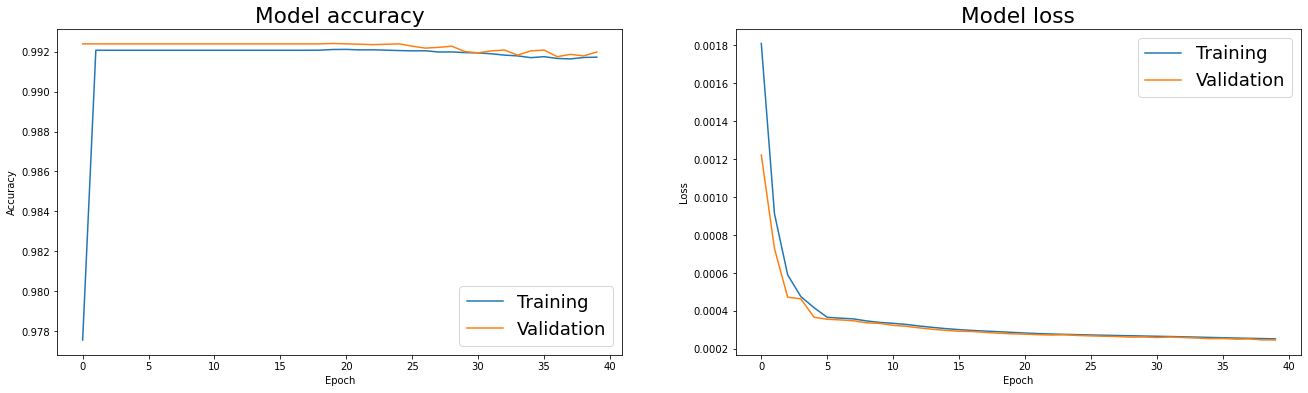

In [80]:
#plt.plot(history.history['accuracy'])
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'], label = 'Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [81]:
#reconstruction error on x_test set
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,51319.000000,51319.0
mean,0.000247,0.0
std,0.000541,0.0
min,0.000016,0.0
25%,0.000101,0.0
50%,0.000155,0.0
75%,0.000247,0.0
max,0.029284,0.0


In [82]:
#we can see from above std deviation is not so much varying while reconstruction of training data
#Evaluation of mse on both classes on test set
y_test=cred_df_scaled_test_set["Class"]
cred_df_scaled_test_set=cred_df_scaled_test_set.drop("Class",axis=1)

In [83]:
predictions = autoencoder.predict(cred_df_scaled_test_set)
mse = np.mean(np.power(cred_df_scaled_test_set - predictions, 2), axis=1)
error_df_test = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df_test.describe()

,reconstruction_error,true_class
count,14462.000000,14462.000000
mean,0.000494,0.017010
std,0.002912,0.129313
min,0.000023,0.000000
25%,0.000101,0.000000
50%,0.000156,0.000000
75%,0.000252,0.000000
max,0.067732,1.000000


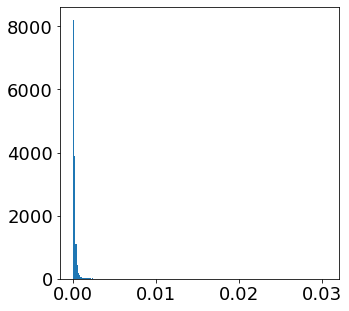

In [84]:
#how much reconstruction error present in class 0 and class 1
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
normal_error_df = error_df_test[(error_df_test['true_class']== 0) & (error_df_test['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=200)

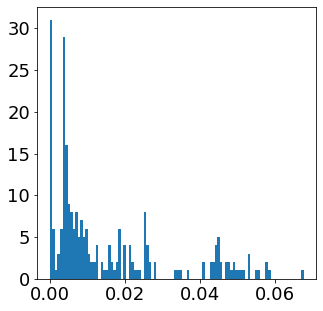

In [85]:
#very small mse will be present we are concerned for deciding the threshold in test set
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
fraud_error_df = error_df_test[error_df_test['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=100)

In [86]:
# MSE for class 1 is much higher than the class 0
#fraud_error_df.describe() 

In [87]:
#normal_error_df.describe() ### non fraud cases

In [88]:
error_df_test["predicted_class"]=[1 if x > 0.001 else 0 for x in error_df_test["reconstruction_error"]]
error_df_test

,reconstruction_error,true_class,predicted_class
266085,0.000114,0,0
172120,0.000121,0,0
15136,0.001585,0,1
96393,0.000153,0,0
208225,0.000280,0,0
...,...,...,...
150644,0.055650,1,1
123201,0.001008,1,1
14170,0.025162,1,1
219025,0.000112,1,0


#####  Evaluation metrics over the threshold we have decided

In [89]:
error_df_test["predicted_class"]=[1 if x > 0.001 else 0 for x in error_df_test["reconstruction_error"]]

In [90]:
error_df_test.reconstruction_error

266085    0.000114
172120    0.000121
15136     0.001585
96393     0.000153
208225    0.000280
            ...   
150644    0.055650
123201    0.001008
14170     0.025162
219025    0.000112
15736     0.025173
Name: reconstruction_error, Length: 14462, dtype: float64

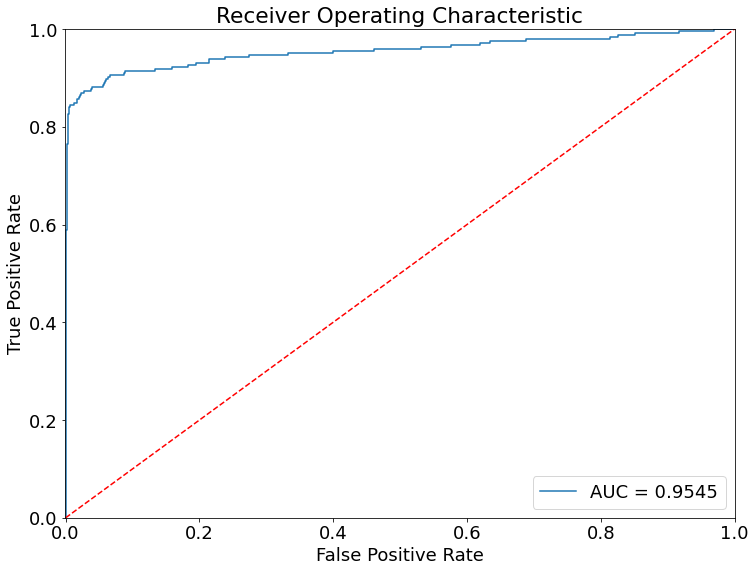

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14216
           1       0.40      0.87      0.55       246

    accuracy                           0.98     14462
   macro avg       0.70      0.92      0.77     14462
weighted avg       0.99      0.98      0.98     14462



In [91]:
fpr, tpr, thresholds = roc_curve(error_df_test.true_class, error_df_test.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();
print(classification_report(error_df_test["true_class"],error_df_test["predicted_class"]))

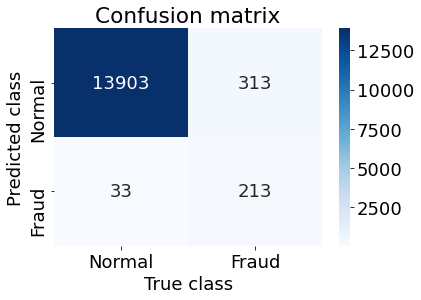

In [92]:
LABELS = ["Normal", "Fraud"]
y_pred = [1 if e > 0.004 else 0 for e in error_df_test.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df_test.true_class,error_df_test.predicted_class)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap = 'Blues');
plt.title("Confusion matrix")
plt.ylabel('Predicted class')
plt.xlabel('True class')
plt.show()

Refer Presentation in pdf for conclusions

Some best performed models
1.Random forest, XG boost with SMOTE
2.Random forest, XG boost with Hyper tuning
3.Stacking

==================================================THE END ===================================================================